In [1]:
import pandas as pd
import json
from pandas import DataFrame

#Importing numpy for working with numpy arrays and other functions
import numpy as np      

#Importing json for reading the json file of tweets
import json

import re

#Elimination of Stop words
from nltk.corpus import stopwords 
from nltk.util import ngrams 

#Counting the frequency
from collections import Counter

#NLP Toolkit
import nltk


# For visualization:
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

tweet_data = pd.read_json('/content/drive/MyDrive/akaikae/akaike/NLP/tweets.json')

In [4]:
tweet_data

,2013-07-18 09:39:46.071961602,2013-07-17 03:40:32.173842437,2013-07-15 15:41:16.553048065,2013-07-12 19:19:42.367813635,2013-07-04 12:40:34.334232586,2013-07-04 08:44:42.278539265,2013-07-04 04:22:03.305394179,2013-07-03 21:48:41.159868423,2013-07-03 15:55:15.081797632,2013-07-03 04:25:53.837944834,...,1987-06-22 19:36:28.372967425,1987-06-22 13:38:05.220745216,1987-06-20 01:14:46.517178368,1987-06-19 13:30:22.587748353,1987-06-19 13:03:48.404117505,1987-06-19 12:17:53.643945985,1987-06-19 12:06:26.675290112,1987-06-17 23:05:41.186953217,1987-06-17 15:18:00.525635584,1987-06-13 10:44:06.537678849
tweet_author,Hematopoiesis News,"Michael Wang, MD",1stOncology,Toby Eyre,Lymphoma Hub,David Ledger,N Wales Cancer Forum,European Pharmaceutical Review,Graham Collins,CLL Ireland,...,C A R E N,Werneth Cricket,"John P. Leonard, MD",Joy is a Lifestyle,Micheál 🇮🇪,Joy is a Lifestyle,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,IQWiG,Medibooks,Medibooks
tweet_text,⚕️ Scientists conducted a Phase II study of ac...,This phase 2 Acalabrutinib-Venetoclax (AV) tri...,#NICE backs #AstraZenecas #Calquence for #CLL ...,#acalabrutinib is a valuable option in pts int...,NICE has recommended the use of acalabrutinib ...,NICE backs AstraZeneca’s Calquence for CLL htt...,This is England for now - these decisions usua...,"AstraZeneca’s Calquence (acalabrutinib), a che...",Superstar @tobyeyre82 responding to the excell...,CLL patients all know the drug Ibrutinib and y...,...,I miss them! 😋😆😅\n\n#FotoRus #FriendshipForeve...,"The fixtures are out, first team will travel t...",Partnering @GileadSciences &amp;Ono BTKi-combo...,Hanging out with Friends! :) #FF #CLL #Happine...,What I'd do to go to Gerrard's last game at An...,Hanging out with Friends! :) #FF #CLL #Happine...,Hanging out with Friends! :) #FF #CLL #Happine...,Zusatznutzen von #Idelalisib ist weder für #CL...,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,#Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...


In [5]:
data=pd.DataFrame(tweet_data)
data

,2013-07-18 09:39:46.071961602,2013-07-17 03:40:32.173842437,2013-07-15 15:41:16.553048065,2013-07-12 19:19:42.367813635,2013-07-04 12:40:34.334232586,2013-07-04 08:44:42.278539265,2013-07-04 04:22:03.305394179,2013-07-03 21:48:41.159868423,2013-07-03 15:55:15.081797632,2013-07-03 04:25:53.837944834,...,1987-06-22 19:36:28.372967425,1987-06-22 13:38:05.220745216,1987-06-20 01:14:46.517178368,1987-06-19 13:30:22.587748353,1987-06-19 13:03:48.404117505,1987-06-19 12:17:53.643945985,1987-06-19 12:06:26.675290112,1987-06-17 23:05:41.186953217,1987-06-17 15:18:00.525635584,1987-06-13 10:44:06.537678849
tweet_author,Hematopoiesis News,"Michael Wang, MD",1stOncology,Toby Eyre,Lymphoma Hub,David Ledger,N Wales Cancer Forum,European Pharmaceutical Review,Graham Collins,CLL Ireland,...,C A R E N,Werneth Cricket,"John P. Leonard, MD",Joy is a Lifestyle,Micheál 🇮🇪,Joy is a Lifestyle,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,IQWiG,Medibooks,Medibooks
tweet_text,⚕️ Scientists conducted a Phase II study of ac...,This phase 2 Acalabrutinib-Venetoclax (AV) tri...,#NICE backs #AstraZenecas #Calquence for #CLL ...,#acalabrutinib is a valuable option in pts int...,NICE has recommended the use of acalabrutinib ...,NICE backs AstraZeneca’s Calquence for CLL htt...,This is England for now - these decisions usua...,"AstraZeneca’s Calquence (acalabrutinib), a che...",Superstar @tobyeyre82 responding to the excell...,CLL patients all know the drug Ibrutinib and y...,...,I miss them! 😋😆😅\n\n#FotoRus #FriendshipForeve...,"The fixtures are out, first team will travel t...",Partnering @GileadSciences &amp;Ono BTKi-combo...,Hanging out with Friends! :) #FF #CLL #Happine...,What I'd do to go to Gerrard's last game at An...,Hanging out with Friends! :) #FF #CLL #Happine...,Hanging out with Friends! :) #FF #CLL #Happine...,Zusatznutzen von #Idelalisib ist weder für #CL...,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,#Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...


In [6]:



with open('/content/drive/MyDrive/akaikae/akaike/NLP/tweets.json', 'r') as f:
    data = json.load(f)

In [7]:
data

{'1374140386071961602': {'tweet_author': 'Hematopoiesis News',
  'tweet_text': '⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'},
 '1374032432173842437': {'tweet_author': 'Michael Wang, MD',
  'tweet_text': 'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N'},
 '1373902876553048065': {'tweet_author': '1stOncology',
  'tweet_text': '#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA'},
 '1373656782367813635': {'tweet_author': 'Toby Eyre',
  'tweet_text': '#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologi

In [8]:
data = pd.DataFrame.from_dict(data)

In [9]:
data

,1374140386071961602,1374032432173842437,1373902876553048065,1373656782367813635,1372941634334232586,1372927482278539265,1372911723305394179,1372888121159868423,1372866915081797632,1372825553837944834,...,551388988372967425,551367485220745216,551150086517178368,551107822587748353,551106228404117505,551103473643945985,551102786675290112,550969541186953217,550941480525635584,550579446537678849
tweet_author,Hematopoiesis News,"Michael Wang, MD",1stOncology,Toby Eyre,Lymphoma Hub,David Ledger,N Wales Cancer Forum,European Pharmaceutical Review,Graham Collins,CLL Ireland,...,C A R E N,Werneth Cricket,"John P. Leonard, MD",Joy is a Lifestyle,Micheál 🇮🇪,Joy is a Lifestyle,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,IQWiG,Medibooks,Medibooks
tweet_text,⚕️ Scientists conducted a Phase II study of ac...,This phase 2 Acalabrutinib-Venetoclax (AV) tri...,#NICE backs #AstraZenecas #Calquence for #CLL ...,#acalabrutinib is a valuable option in pts int...,NICE has recommended the use of acalabrutinib ...,NICE backs AstraZeneca’s Calquence for CLL htt...,This is England for now - these decisions usua...,"AstraZeneca’s Calquence (acalabrutinib), a che...",Superstar @tobyeyre82 responding to the excell...,CLL patients all know the drug Ibrutinib and y...,...,I miss them! 😋😆😅\n\n#FotoRus #FriendshipForeve...,"The fixtures are out, first team will travel t...",Partnering @GileadSciences &amp;Ono BTKi-combo...,Hanging out with Friends! :) #FF #CLL #Happine...,What I'd do to go to Gerrard's last game at An...,Hanging out with Friends! :) #FF #CLL #Happine...,Hanging out with Friends! :) #FF #CLL #Happine...,Zusatznutzen von #Idelalisib ist weder für #CL...,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,#Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...


In [10]:
tweet_data = data.transpose()


In [11]:
tweet_data

,tweet_author,tweet_text
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
...,...,...
551103473643945985,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...
550969541186953217,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...
550941480525635584,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...


In [12]:
tweet_data.head(5)

,tweet_author,tweet_text
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...


In [13]:
tweet_data.index.name = "tweet_index"
tweet_data

,tweet_author,tweet_text
tweet_index,,
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
...,...,...
551103473643945985,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...
550969541186953217,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...


In [14]:
tweet_data.shape

(43347, 2)

In [15]:
tweet_data.info

<bound method DataFrame.info of                            tweet_author  \
tweet_index                               
1374140386071961602  Hematopoiesis News   
1374032432173842437    Michael Wang, MD   
1373902876553048065         1stOncology   
1373656782367813635           Toby Eyre   
1372941634334232586        Lymphoma Hub   
...                                 ...   
551103473643945985   Joy is a Lifestyle   
551102786675290112        𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹   
550969541186953217                IQWiG   
550941480525635584            Medibooks   
550579446537678849            Medibooks   

                                                            tweet_text  
tweet_index                                                             
1374140386071961602  ⚕️ Scientists conducted a Phase II study of ac...  
1374032432173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...  
1373902876553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...  
1373656782367813635  #acalabrutinib is a va

In [16]:
# Replacing punctuations & patterns with space
tweet_data['tweet_text'] = tweet_data['tweet_text'].str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-16-35e4732b51de>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_data['tweet_text'] = tweet_data['tweet_text'].str.replace("[^a-zA-Z0-9]", " ")


In [17]:
tweet_data.head(10)

,tweet_author,tweet_text
tweet_index,,
1374140386071961602,Hematopoiesis News,Scientists conducted a Phase II study of ac...
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib Venetoclax AV tri...
1373902876553048065,1stOncology,NICE backs AstraZenecas Calquence for CLL ...
1373656782367813635,Toby Eyre,acalabrutinib is a valuable option in pts int...
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
1372927482278539265,David Ledger,NICE backs AstraZeneca s Calquence for CLL htt...
1372911723305394179,N Wales Cancer Forum,This is England for now these decisions usua...
1372888121159868423,European Pharmaceutical Review,AstraZeneca s Calquence acalabrutinib a che...
1372866915081797632,Graham Collins,Superstar tobyeyre82 responding to the excell...


In [18]:
!pip install Translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import nltk
!pip install googletrans
from googletrans import Translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 7.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=5270a667900775fe8396f6da8f2d211693607d6fc12843c6b4a542d92addfe0e
  Stored in directory: /root/.cache/pip/wheels/0e/ce/9b/d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
   

In [20]:
!pip install translate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from translate import Translator

# Create an empty list to store the translated tweets
translated_tweets = []

# Iterate through each tweet in the dataframe
for index, row in tweet_data.iterrows():
    # Create a Translator object
    translator= Translator(to_lang="en")
    # Translate the tweet text
    translated_tweet = translator.translate(row['tweet_text'])
    # Append the translated tweet to the list
    translated_tweets.append(translated_tweet)

# Add the translated tweets as a new column in the dataframe
tweet_data['translated_tweet'] = translated_tweets


In [22]:
tweet_data

,tweet_author,tweet_text,translated_tweet
tweet_index,,,
1374140386071961602,Hematopoiesis News,Scientists conducted a Phase II study of ac...,Scientists conducted a Phase II study of ac...
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib Venetoclax AV tri...,This phase 2 Acalabrutinib Venetoclax AV tri...
1373902876553048065,1stOncology,NICE backs AstraZenecas Calquence for CLL ...,NICE backs AstraZenecas Calquence for CLL ...
1373656782367813635,Toby Eyre,acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts int...
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,NICE has recommended the use of acalabrutinib ...
...,...,...,...
551103473643945985,Joy is a Lifestyle,Hanging out with Friends FF CLL Happine...,Hanging out with Friends FF CLL Happine...
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends FF CLL Happine...,Hanging out with Friends FF CLL Happine...
550969541186953217,IQWiG,Zusatznutzen von Idelalisib ist weder f r CL...,Zusatznutzen von Idelalisib ist weder f r CL...


In [23]:
#replacing short words
tweet_data['translated_tweet'] = tweet_data['translated_tweet'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))['translated_tweet'] = tweet_data['translated_tweet'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [24]:
tweet_data

,tweet_author,tweet_text,translated_tweet
tweet_index,,,
1374140386071961602,Hematopoiesis News,Scientists conducted a Phase II study of ac...,Scientists conducted Phase study acalabrutinib...
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib Venetoclax AV tri...,This phase Acalabrutinib Venetoclax trial that...
1373902876553048065,1stOncology,NICE backs AstraZenecas Calquence for CLL ...,NICE backs AstraZenecas Calquence for CLL http...
1373656782367813635,Toby Eyre,acalabrutinib is a valuable option in pts int...,acalabrutinib valuable option pts intolerant i...
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,NICE has recommended the use acalabrutinib for...
...,...,...,...
551103473643945985,Joy is a Lifestyle,Hanging out with Friends FF CLL Happine...,Hanging out with Friends CLL Happiness http Pd...
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends FF CLL Happine...,Hanging out with Friends CLL Happiness http gy...
550969541186953217,IQWiG,Zusatznutzen von Idelalisib ist weder f r CL...,Zusatznutzen von Idelalisib ist weder CLL noch...


In [25]:
tweet_data.drop(columns='tweet_text', inplace=True)


In [26]:
tweet_data

,tweet_author,translated_tweet
tweet_index,,
1374140386071961602,Hematopoiesis News,Scientists conducted Phase study acalabrutinib...
1374032432173842437,"Michael Wang, MD",This phase Acalabrutinib Venetoclax trial that...
1373902876553048065,1stOncology,NICE backs AstraZenecas Calquence for CLL http...
1373656782367813635,Toby Eyre,acalabrutinib valuable option pts intolerant i...
1372941634334232586,Lymphoma Hub,NICE has recommended the use acalabrutinib for...
...,...,...
551103473643945985,Joy is a Lifestyle,Hanging out with Friends CLL Happiness http Pd...
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends CLL Happiness http gy...
550969541186953217,IQWiG,Zusatznutzen von Idelalisib ist weder CLL noch...


In [27]:
# make entire text lowercase
tweet_data['translated_tweet'] = [row.lower() for row in tweet_data['translated_tweet']]

In [28]:
tweet_data

,tweet_author,translated_tweet
tweet_index,,
1374140386071961602,Hematopoiesis News,scientists conducted phase study acalabrutinib...
1374032432173842437,"Michael Wang, MD",this phase acalabrutinib venetoclax trial that...
1373902876553048065,1stOncology,nice backs astrazenecas calquence for cll http...
1373656782367813635,Toby Eyre,acalabrutinib valuable option pts intolerant i...
1372941634334232586,Lymphoma Hub,nice has recommended the use acalabrutinib for...
...,...,...
551103473643945985,Joy is a Lifestyle,hanging out with friends cll happiness http pd...
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,hanging out with friends cll happiness http gy...
550969541186953217,IQWiG,zusatznutzen von idelalisib ist weder cll noch...


In [29]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))

#filtered_words = [word for word in all_words if word.lower() not in stop_words]
# # Making custom list of words to be removed 
# add_words = ['movie','film','one','make','even','see','movies','get','makes','making','time','watch','character','good','like','well','would']
add_words = ['http','https','cll','tlr','make','even','see','the','get','makes','making','time','watch','character','good','like','would']
# # Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(tweets):

    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
  tweet_tokenized = word_tokenize(tweets)
  tweet_new = " ".join([i for i in tweet_tokenized  if i not in stop_words])
  return tweet_new

# Removing stopwords
tweet_data['translated_tweet'] = [remove_stopwords(r) for r in tweet_data['translated_tweet']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
tweet_data

,tweet_author,translated_tweet
tweet_index,,
1374140386071961602,Hematopoiesis News,scientists conducted phase study acalabrutinib...
1374032432173842437,"Michael Wang, MD",phase acalabrutinib venetoclax trial still rec...
1373902876553048065,1stOncology,nice backs astrazenecas calquence vb5lpdogra
1373656782367813635,Toby Eyre,acalabrutinib valuable option pts intolerant i...
1372941634334232586,Lymphoma Hub,nice recommended use acalabrutinib patients tr...
...,...,...
551103473643945985,Joy is a Lifestyle,hanging friends happiness pdleww6bbb
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,hanging friends happiness gynchdnul2
550969541186953217,IQWiG,zusatznutzen von idelalisib ist weder noch ref...


In [31]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))

# filtered_words = [word for word in all_words if word.lower() not in stop_words]

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


tweet_data['translated_tweet'] = tweet_data['translated_tweet'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [35]:
tweet_data

,tweet_author,translated_tweet
tweet_index,,
1374140386071961602,Hematopoiesis News,scientist conduct phase study acalabrutinib pa...
1374032432173842437,"Michael Wang, MD",phase acalabrutinib venetoclax trial still rec...
1373902876553048065,1stOncology,nice back astrazenecas calquence vb5lpdogra
1373656782367813635,Toby Eyre,acalabrutinib valuable option pt intolerant ib...
1372941634334232586,Lymphoma Hub,nice recommend use acalabrutinib patient treat...
...,...,...
551103473643945985,Joy is a Lifestyle,hang friend happiness pdleww6bbb
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,hang friend happiness gynchdnul2
550969541186953217,IQWiG,zusatznutzen von idelalisib ist weder noch ref...


In [36]:
tweet_data["translated_tweet"] = tweet_data["translated_tweet"].apply(lambda x: re.sub(r"(\w*)(\w)\2+", r"\1\2", x))

In [37]:
tweet_data

,tweet_author,translated_tweet
tweet_index,,
1374140386071961602,Hematopoiesis News,scientist conduct phase study acalabrutinib pa...
1374032432173842437,"Michael Wang, MD",phase acalabrutinib venetoclax trial stil recr...
1373902876553048065,1stOncology,nice back astrazenecas calquence vb5lpdogra
1373656782367813635,Toby Eyre,acalabrutinib valuable option pt intolerant ib...
1372941634334232586,Lymphoma Hub,nice recomend use acalabrutinib patient treatm...
...,...,...
551103473643945985,Joy is a Lifestyle,hang friend happines pdleww6bb
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,hang friend happines gynchdnul2
550969541186953217,IQWiG,zusatznutzen von idelalisib ist weder noch ref...


In [38]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    text = text.lower() # convert to lowercase
    text = [word for word in text.split() if word not in stopwords.words('english')] # remove stopwords
    text = ' '.join(text) # join the cleaned words
    return text

tweet_data['translated_tweet'] = tweet_data['translated_tweet'].apply(lambda x: clean_text(x))


In [39]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import itertools

In [41]:
from textblob import TextBlob

# create a new column 'entity'
tweet_data["entity"] = ""

# loop through the 'translated_tweet' column
for index, row in tweet_data.iterrows():
    blob = TextBlob(row["translated_tweet"])
    nouns = []
    for word, tag in blob.tags:
        if tag in ["NN", "NNS"]: # checking for Nouns
            nouns.append(word)
    entity = " ".join(nouns)
    tweet_data.at[index, "entity"] = entity

# drop unnecessary words
tweet_data["translated_tweet"] = tweet_data["translated_tweet"].apply(lambda x: " ".join([word for word, tag in TextBlob(x).tags if tag not in ["DT", "IN"]]))

# remove repeated letters
tweet_data["translated_tweet"] = tweet_data["translated_tweet"].apply(lambda x: "".join("".join(s)[:2] for _, s in itertools.groupby(x)))

print(tweet_data)


                           tweet_author  \
tweet_index                               
1374140386071961602  Hematopoiesis News   
1374032432173842437    Michael Wang, MD   
1373902876553048065         1stOncology   
1373656782367813635           Toby Eyre   
1372941634334232586        Lymphoma Hub   
...                                 ...   
551103473643945985   Joy is a Lifestyle   
551102786675290112        𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹   
550969541186953217                IQWiG   
550941480525635584            Medibooks   
550579446537678849            Medibooks   

                                                      translated_tweet  \
tweet_index                                                              
1374140386071961602  scientist conduct phase study acalabrutinib pa...   
1374032432173842437  phase acalabrutinib venetoclax trial stil recr...   
1373902876553048065        nice back astrazenecas calquence vb5lpdogra   
1373656782367813635  acalabrutinib valuable option pt intolerant ib...

In [42]:
tweet_data

,tweet_author,translated_tweet,entity
tweet_index,,,
1374140386071961602,Hematopoiesis News,scientist conduct phase study acalabrutinib pa...,scientist conduct phase study patient ibrutini...
1374032432173842437,"Michael Wang, MD",phase acalabrutinib venetoclax trial stil recr...,phase acalabrutinib trial stil recruitment pha...
1373902876553048065,1stOncology,nice back astrazenecas calquence vb5lpdogra,calquence vb5lpdogra
1373656782367813635,Toby Eyre,acalabrutinib valuable option pt intolerant ib...,acalabrutinib option pt ibrutinib data help de...
1372941634334232586,Lymphoma Hub,nice recomend use acalabrutinib patient treatm...,recomend use patient treatment leukemia lymphoma
...,...,...,...
551103473643945985,Joy is a Lifestyle,hang friend happines pdleww6bb,hang friend happines
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,hang friend happines gynchdnul2,hang friend happines
550969541186953217,IQWiG,zusatznutzen von idelalisib ist weder noch ref...,zusatznutzen von ist weder noch refrakt lympho...


In [43]:
!pip install pattern





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 KB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.8 MB/s eta 0:00:00
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332722 sha256=821e8303a

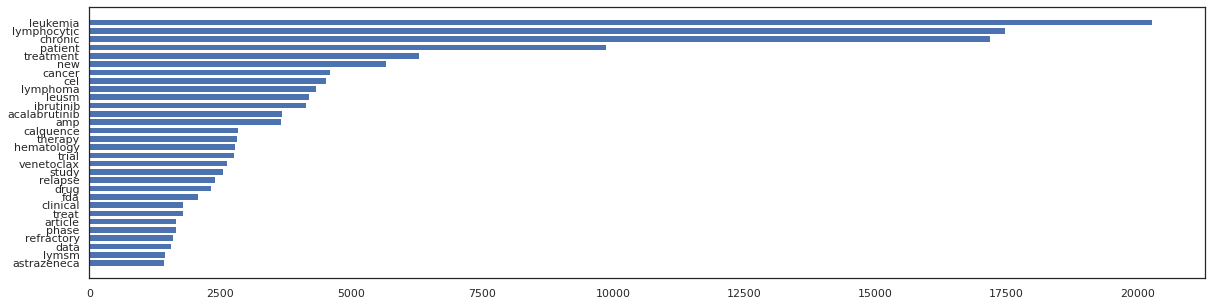

In [44]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# # Subset positive review dataset
#all_words_df = df.loc[df['Target'] == 4,:]
all_words_df = tweet_data['translated_tweet']

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df.values])
all_words = all_words.split()
words_data = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_data = pd.DataFrame({'word':list(words_data.keys()), 'count':list(words_data.values())})
words_data
# Subsets top 30 words by frequency
words_data = words_data.nlargest(columns="count", n = 30) 

words_data.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_data['word'], width = words_data['count'])
plt.show()

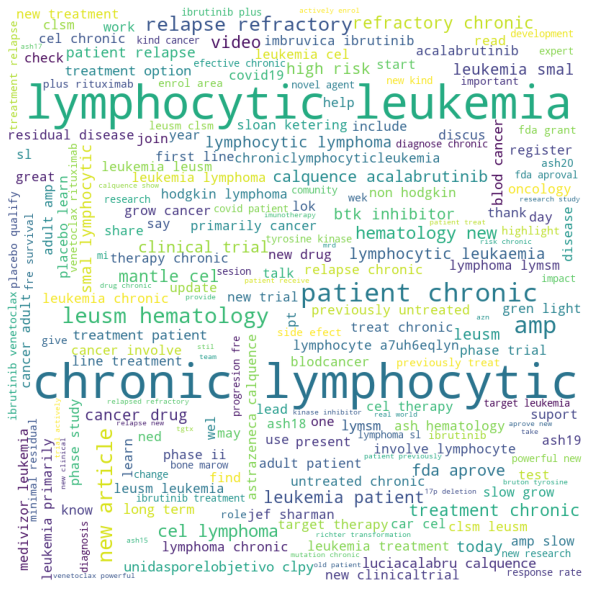

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of all the translated tweets
all_words = ' '.join([text for text in tweet_data['translated_tweet']])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(all_words)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


In [46]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")


# Initialize an empty list to store the entities
entities = []

# Iterate over the tweets
for index, row in tweet_data.iterrows():
    # Process the tweet text with spaCy
    doc = nlp(row["translated_tweet"])
    # Iterate over the entities in the tweet
    for ent in doc.ents:
        entities.append(ent.text)

# Count the frequency of each entity
entity_freq = pd.Series(entities).value_counts()

# Write the entity frequency to a CSV file
entity_freq.to_csv("objective1.csv")


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [47]:
pd.read_csv("objective1.csv")

,Unnamed: 0,0
0,fda,1961
1,today,941
2,first,848
3,lok,499
4,one,420
...,...,...
25252,0gwkjocjsi,1
25253,ang lica zquez,1
25254,cd19 lef1,1
25255,mimo puedo,1


In [48]:
tweet_data = pd.DataFrame(entities,columns=["Entities"])
tweet_data["Entities"].value_counts()


fda               1961
today              941
first              848
lok                499
one                420
                  ... 
0gwkjocjsi           1
ang lica zquez       1
cd19 lef1            1
mimo puedo           1
yzvk2n9usz           1
Name: Entities, Length: 25257, dtype: int64